# Student Intern Comprehensive analysis

### Objective

The objective of the project is to conduct a comprehensive analysis of the student interns to gain insights about relationship between their academic performance, event participation, career aspiration and factors influencing their success by analyzing the dataset containing attributes for each student.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("E:/Datascience_activity/cloudcounselage.csv")

In [3]:
display(data)

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Patel Niraj,patelniraj@xyz.com,1,The SDLC & their transformations,Attending,"thakur institute of management studies, career...",LinkedIn | Whatsapp | Email,NaN,Students,2024,Jodhpur,6.9,6,0-2 Lakh,15,yes
4890,VIDIT,vidit@xyz.com,1,Data Visualization using Power BI,Attending,government polytechnic gandhinagar,NaN,NaN,Students,2023,Jalgaon,6.5,6,0-2 Lakh,8,no
4891,Suryaprakash,suryaprakash@xyz.com,1,Data Visualization using Power BI,Attending,"vishwakarma institute of technology, pune",NaN,NaN,Students,2024,Thane,6.9,5,0-2 Lakh,7,no
4892,Saif ali,saifali@xyz.com,1,Data Visualization using Power BI,Attending,"mit academy of engineering ,alandi",NaN,NaN,Students,2024,Patiala,9.0,3,0-2 Lakh,23,yes


In [4]:
data.shape

(4894, 16)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [6]:
df=pd.DataFrame(data)

In [7]:
print(df.duplicated().sum())

0


## BASIC QUESTIONS

### 1. How many unique students are included in the dataset?

In [8]:
# Let us assume each student has a unique email id, Hence using this we can find the total number of unique students

unique_students = df['Email ID'].nunique()
print("The number of unique students included in the dataset is :",unique_students)

The number of unique students included in the dataset is : 2157


### 2. What is the average GPA of the students?

In [9]:
average_gpa = df['CGPA'].mean()
print(f'The average GPA of the students is : {average_gpa:.2f}')

The average GPA of the students is : 8.04


### 3. What is the distribution of students across different graduation years?

In [10]:
graduation= df['Year of Graduation'].value_counts().reset_index()
graduation.columns = ['Year of Graduation','Number of Columns']

graduation = graduation.sort_values(by='Year of Graduation')

graduation

,Year of Graduation,Number of Columns
0,2023,1536
1,2024,1511
2,2025,1292
3,2026,555


### 4. What is the distribution of student's experience with python programming?

In [11]:
experience = df['Experience with python (Months)'].value_counts().reset_index()

experience.columns=['Experience with python (Months)','Number of students']
experience = experience.sort_values(by='Experience with python (Months)')
experience

,Experience with python (Months),Number of students
1,3,1008
5,4,466
0,5,1242
3,6,738
4,7,640
2,8,800


### 5. What is the average family income of the student?

In [12]:
df['Family Income']=df['Family Income'].apply(lambda x: int(x.split()[0].replace('-','').replace('Lakh+','00000')))

income = df['Family Income'].mean()
print(f'The average family income of the student is: {income:.2f}')

The average family income of the student is: 3.93


In [13]:
df2=pd.DataFrame(data)

### 6. How does the GPA vary among different colleges?

In [14]:
college_gpa = df2.groupby('College Name')['CGPA'].mean().reset_index()
college_gpa = college_gpa.sort_values(by='CGPA',ascending = False)
college_gpa

,College Name,CGPA
23,"THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER...",8.585714
20,St Xavier's College,8.578571
3,"B. K. Birla College of Arts, Science & Commerc...",8.456410
22,"Symbiosis Institute of Technology, Pune",8.303448
2,AP SHAH INSTITUTE OF TECHNOLOGY,8.283333
14,"MIT Academy Of Engineering ,Alandi",8.282353
5,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,8.266667
7,Don Bosco College of Engineering Fatorda Goa,8.232143
24,"Vidyalankar Institute of Technology, Mumbai",8.196078
19,Silicon Institute of Technology,8.150000


### 7. Are there any outliers in the quantity (number of courses completed) attribute?

In [29]:
q1 = df2['Quantity'].quantile(0.25)
q3=df2['Quantity'].quantile(0.75)

iqr = q3 - q1
lt= q1 - 1.5* iqr
ht = q3 + 1.5* iqr

potential_outliers = df2[(df2['Quantity'] < lt) | (df2['Quantity'] > ht)]
print(potential_outliers)

Empty DataFrame
Columns: [First Name, Email ID, Quantity, Events, Attendee Status, College Name, How did you come to know about this event?, Specify in "Others" (how did you come to know about this event), Designation, Year of Graduation, City, CGPA, Experience with python (Months), Family Income, Expected salary (Lac), Leadership- skills]
Index: []


### 8. What is the average GPA for each city?


In [16]:
city_gpa = df2.groupby('City')['CGPA'].mean().reset_index()
display(city_gpa)

,City,CGPA
0,Agartala,7.660714
1,Agra,8.046429
2,Ahemdabad,8.190385
3,Ajmer,8.284314
4,Akola,8.021429
...,...,...
172,Vidisha,7.738095
173,Vijaywada,7.986364
174,Wardha,8.328571
175,konark,8.071429


### 9. Can we identify any relationship between family income and GPA

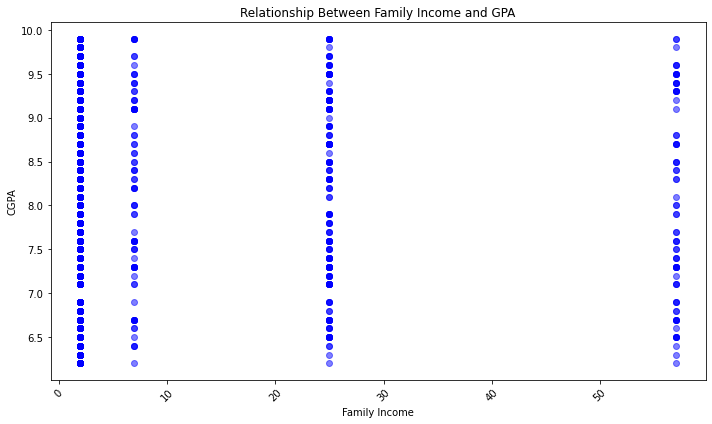

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Family Income'], df['CGPA'], color='blue', alpha=0.5)
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Relationship Between Family Income and GPA')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

## MODERATE QUESTIONS

### 10. How many students from various cities? (Solve using data visualization tool).

In [17]:
import matplotlib.pyplot as plt

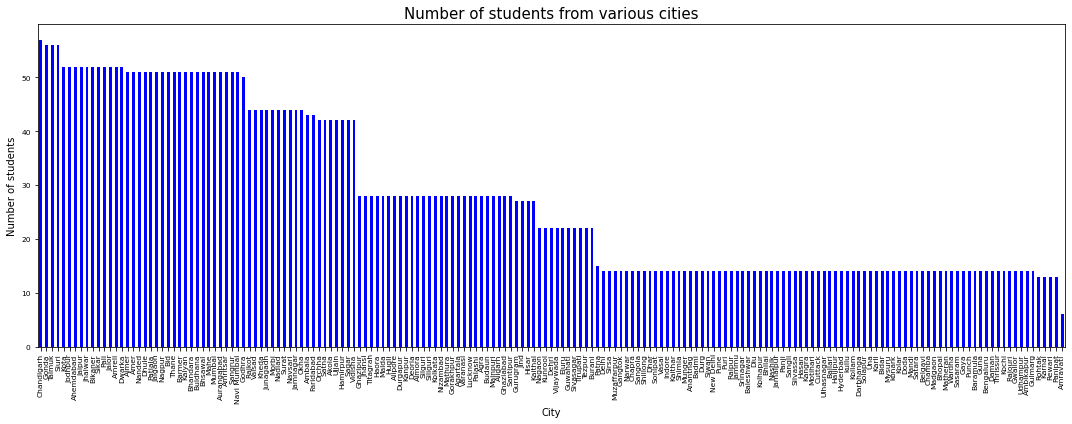

Number of students from various cities:
Chandigarh    57
Gonda         56
Talmuk        56
Siuri         56
Kota          52
              ..
Rohtak        13
Karnal        13
Rewari        13
Panipat       13
Amravati       6
Name: City, Length: 177, dtype: int64


In [26]:
city_counts = df['City'].value_counts()
plt.figure(figsize=(15,6))
city_counts.plot(kind = 'bar', color = 'blue', fontsize = 7.5)
plt.xlabel('City')
plt.ylabel('Number of students')
plt.title('Number of students from various cities', fontsize=15)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()
print("Number of students from various cities:")
print(city_counts)

### 11. How the expected salary vary based on factors like 'GPA', 'Family Income', 'Experience with python (Months)'?

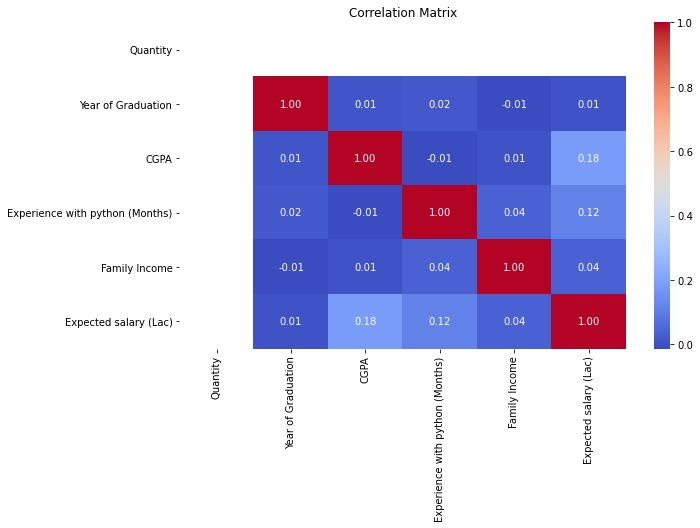

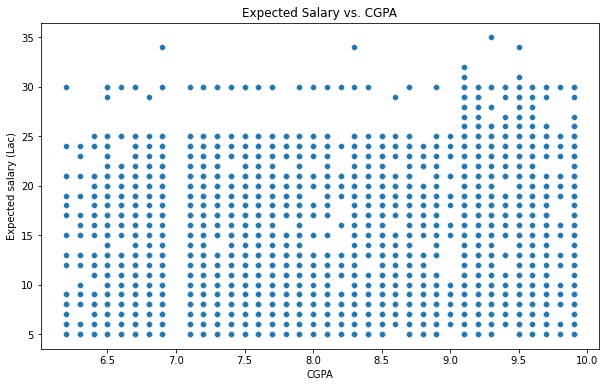

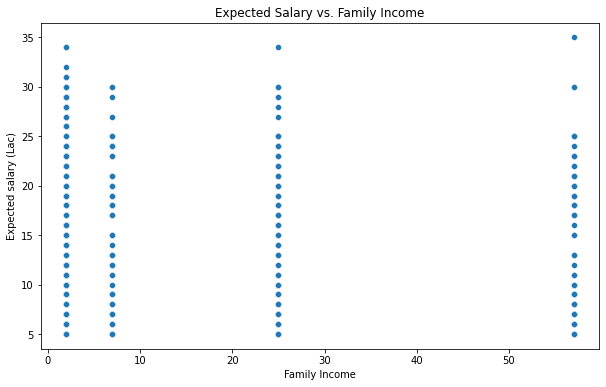

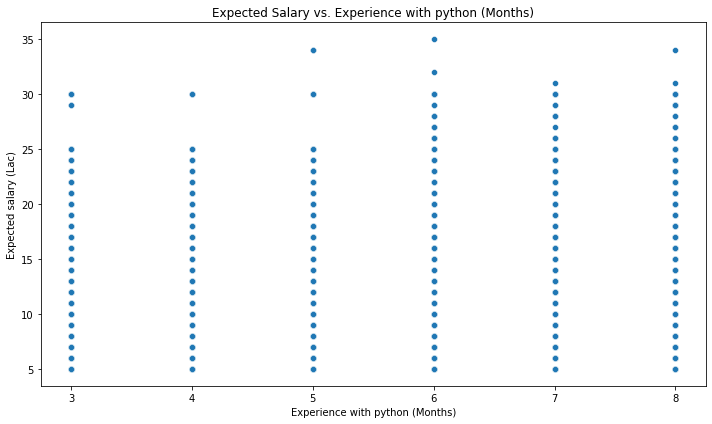

In [19]:
import seaborn as sns

# Calculate correlation coefficients
correlation_matrix = df2.corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

# Scatter plot: Expected Salary vs. CGPA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='CGPA', y='Expected salary (Lac)')
plt.title('Expected Salary vs. CGPA')

# Scatter plot: Expected Salary vs. Family Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Family Income', y='Expected salary (Lac)')
plt.title('Expected Salary vs. Family Income')

# Scatter plot: Expected Salary vs. Experience with Python (Months)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Experience with python (Months)', y='Expected salary (Lac)')
plt.title('Expected Salary vs. Experience with python (Months)')

# Show plots
plt.tight_layout()
plt.show()

### 13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

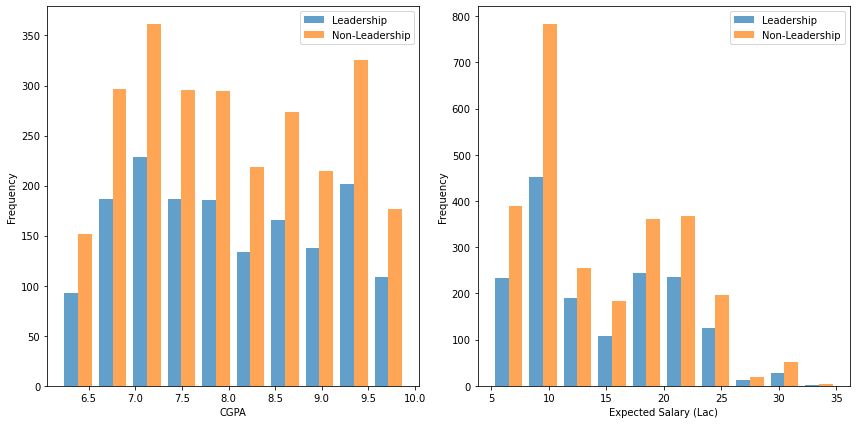

Mean CGPA (Leadership): 8.036787247087704
Mean Expected Salary (Leadership): 13.971796443899448
Mean CGPA (Non-Leadership): 8.04044427422444
Mean Expected Salary (Non-Leadership): 13.795097663730372


In [20]:
leadership_students = df2[df2['Leadership- skills'] == 'yes']
non_leadership_students = df2[df2['Leadership- skills'] == 'no']

# Data Exploration
# Calculate mean CGPA and Expected Salary for both groups
mean_cgpa_leadership = leadership_students['CGPA'].mean()
mean_salary_leadership = leadership_students['Expected salary (Lac)'].mean()

mean_cgpa_non_leadership = non_leadership_students['CGPA'].mean()
mean_salary_non_leadership = non_leadership_students['Expected salary (Lac)'].mean()

# Visualization
plt.figure(figsize=(12, 6))

# CGPA Comparison
plt.subplot(1, 2, 1)
plt.hist([leadership_students['CGPA'], non_leadership_students['CGPA']], bins=10, label=['Leadership', 'Non-Leadership'], alpha=0.7)
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.legend()

# Expected Salary Comparison
plt.subplot(1, 2, 2)
plt.hist([leadership_students['Expected salary (Lac)'], non_leadership_students['Expected salary (Lac)']], bins=10, label=['Leadership', 'Non-Leadership'], alpha=0.7)
plt.xlabel('Expected Salary (Lac)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Output Mean Values
print(f"Mean CGPA (Leadership): {mean_cgpa_leadership}")
print(f"Mean Expected Salary (Leadership): {mean_salary_leadership}")
print(f"Mean CGPA (Non-Leadership): {mean_cgpa_non_leadership}")
print(f"Mean Expected Salary (Non-Leadership): {mean_salary_non_leadership}")

### 14. How many students are graduating by the end of 2024?

In [21]:
graduating_students = df2[df2['Year of Graduation'] <= 2024]

# Count the number of graduating students
num_graduating_students = len(graduating_students)

# Display the result
print(f"Number of students graduating by the end of 2024: {num_graduating_students}")

Number of students graduating by the end of 2024: 3047


### 15. Which promotion channel brings in more student participations for the event?

<ipython-input-22-6a6e41c84763>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


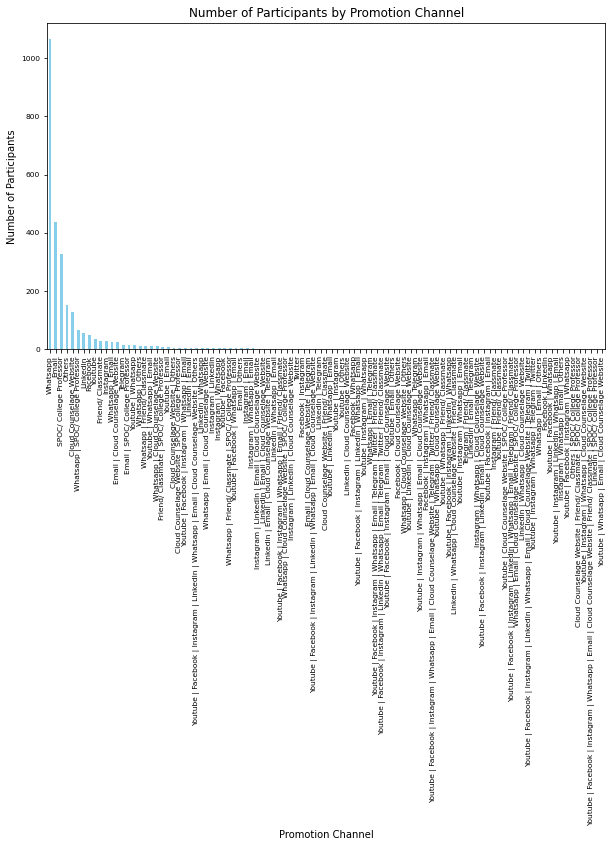

The promotion channel with the highest participation is: Whatsapp


In [22]:
promotion_counts = df2['How did you come to know about this event?'].value_counts()

# Visualization (Bar chart)
plt.figure(figsize=(10, 6))
promotion_counts.plot(kind='bar', color='skyblue',fontsize=7.5)
plt.xlabel('Promotion Channel')
plt.ylabel('Number of Participants')
plt.title('Number of Participants by Promotion Channel')
#plt.xticks(rotation=45)  # Rotate channel names for readability

# Show the plot
plt.tight_layout()
plt.show()

# Identify the promotion channel with the highest participation
most_participated_channel = promotion_counts.idxmax()
print(f"The promotion channel with the highest participation is: {most_participated_channel}")

### 16. Find the total number of students who attended the events related to Data science? (From all Data science related courses)

In [23]:
# Define a list of Data Science-related keywords or event names
data_science_keywords = ['Data Visualization using Power BI','Data Science', 'Python for Data Science', 'Machine Learning']

# Filter the DataFrame to include only rows with Data Science-related events
data_science_attendees = df2[df2['Events'].str.contains('|'.join(data_science_keywords), case=False, na=False)]

# Count the unique students who attended Data Science-related events
num_data_science_students = len(data_science_attendees['First Name'].unique())

# Display the result
print(f"Total number of students who attended Data Science-related events: {num_data_science_students}")

Total number of students who attended Data Science-related events: 592


### 17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

In [24]:
high_cgpa_threshold = 8.0
more_experience_threshold = 6  # 6 months or more
high_salary_expectation = 10  # 10 Lacs or more

# Filter the dataset based on criteria
filtered_students = df2[(df2['CGPA'] >= high_cgpa_threshold) & (df2['Experience with python (Months)'] >= more_experience_threshold) & (df2['Expected salary (Lac)'] >= high_salary_expectation)]

# Calculate the average expected salary for these students
avg_expected_salary = filtered_students['Expected salary (Lac)'].mean()

# Display the result
print(f"Average expected salary for students with high CGPA, more experience, and high salary expectations: {avg_expected_salary:.2f} Lacs")

Average expected salary for students with high CGPA, more experience, and high salary expectations: 19.65 Lacs


### 18. How many students know about the event from their colleges? Which of these Top 5 colleges?

In [25]:
# Filter the dataset to include only rows where students learned about the event from their colleges
college_attendees = df2[(df2['How did you come to know about this event?'] == 'College') | (df['Specify in "Others" (how did you come to know about this event)'] == 'College')]

# Count the number of students from each college
college_counts = college_attendees['College Name'].value_counts()

# Identify the top 5 colleges with the most students
top_5_colleges = college_counts.head(5)

# Display the result
print(f"Number of students who know about the event from their colleges: {len(college_attendees)}")
print()
print(f"Top 5 colleges with the most students:\n{top_5_colleges}")

Number of students who know about the event from their colleges: 71

Top 5 colleges with the most students:
vidyalankar institute of technology, mumbai    5
Wilson college                                 5
GOVERNMENT POLYTECHNIC GANDHINAGAR             4
wilson college                                 4
Vishwakarma Institute of Technology, Pune      3
Name: College Name, dtype: int64
